In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
(X_train, y_train), (X_test, y_test) =  datasets.cifar10.load_data()

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [29]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1)
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

In [17]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

In [20]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


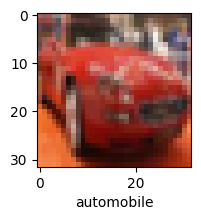

In [21]:
plot_sample(X_train, y_train,5)

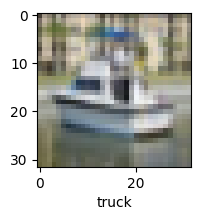

In [25]:
plot_sample(X_train, y_train,501)

In [26]:
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='relu'),
])
ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.1071 - loss: 12.5673
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 91ms/step - accuracy: 0.0992 - loss: 11.0287
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.0983 - loss: 11.0895
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.1000 - loss: 11.0259
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.0996 - loss: 11.0519


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import seaborn as sns


<function matplotlib.pyplot.show(close=None, block=None)>

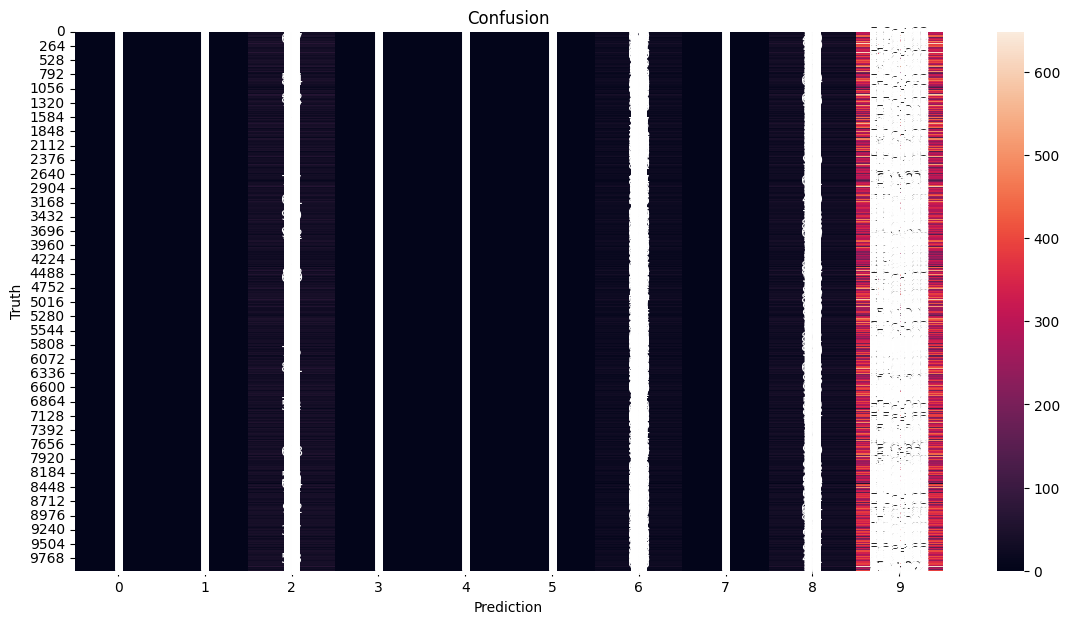

In [32]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion')
plt.show

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3695 - loss: 1.7222
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 69ms/step - accuracy: 0.5890 - loss: 1.1665
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.6442 - loss: 1.0205
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6777 - loss: 0.9305
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7004 - loss: 0.8669
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7204 - loss: 0.8094
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7363 - loss: 0.7615
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7561 - loss: 0.7057
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7632 - loss: 0.6861
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7765 - loss: 0.6388


In [38]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6924 - loss: 0.9427


[0.9492781162261963, 0.6881999969482422]

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[3.96658387e-03, 2.44518812e-03, 9.33535211e-03, 9.13117766e-01,
        1.11186469e-03, 1.15836579e-02, 4.74697575e-02, 5.45301056e-03,
        5.47935441e-03, 3.75150012e-05],
       [3.23152170e-03, 1.30773589e-01, 1.05735285e-06, 1.85100404e-07,
        1.10974641e-09, 1.05973763e-09, 1.46918278e-09, 1.88078086e-09,
        8.65923703e-01, 6.99624434e-05],
       [3.09062630e-01, 7.32282475e-02, 2.04388350e-02, 9.00826603e-02,
        1.61564490e-03, 6.25233585e-03, 1.32461265e-03, 4.84832656e-03,
        4.61031556e-01, 3.21151279e-02],
       [7.93726981e-01, 6.29467750e-03, 6.02169940e-03, 2.49506207e-04,
        1.05607801e-03, 4.54745441e-06, 3.92236689e-05, 2.09726823e-05,
        1.92572117e-01, 1.40814009e-05],
       [4.76843206e-06, 2.09682603e-05, 4.92067868e-03, 2.16423832e-02,
        7.85781026e-01, 1.94038590e-03, 1.85582936e-01, 1.05602136e-04,
        8.33230956e-07, 3.96445955e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

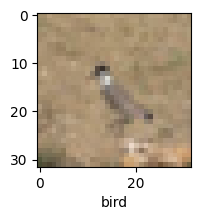

In [54]:
plot_sample(X_test, y_test, 424)

In [55]:
classes[y_classes[424]]

'deer'